### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-03,440225,4554167,647579,582670,262221,133365,129410,182341,115269,92331,84795,125158,109549,4848,198420
2021-09-04,440533,4561905,648106,583362,262868,133485,129466,183117,115352,92352,84795,125230,110064,4848,198447
2021-09-05,440752,4568372,648468,583628,263140,133553,129515,183896,115401,92360,84795,125278,110674,4848,198488
2021-09-06,441042,4576291,648998,583810,263470,133598,129567,184672,115563,92419,84928,125331,111257,4848,198523
2021-09-07,441411,4586161,650511,584108,264541,133808,129638,185447,115680,92463,85066,125378,111892,4848,198568


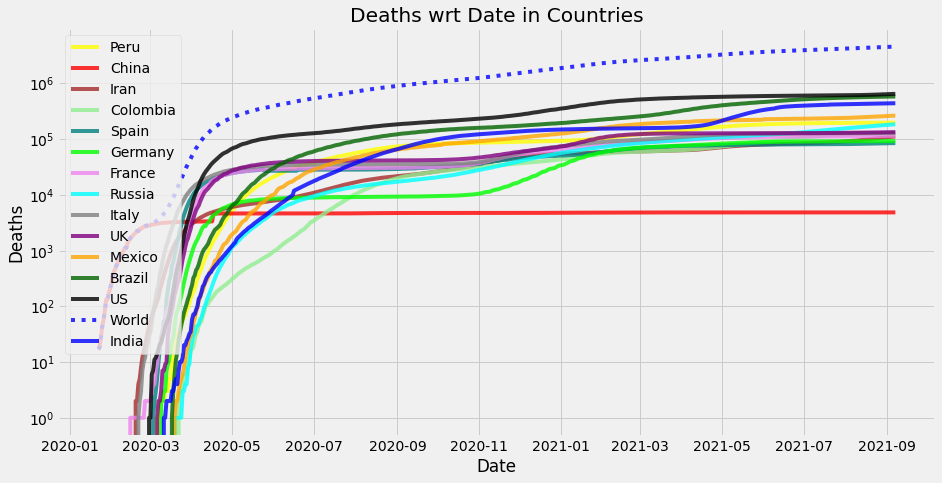

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-03,42618,781438,300961,25565,17409,42355,6729,18470,15224,2899,6311,1850,27621,27,974
2021-09-04,42766,480942,56171,21804,15586,36725,6156,18400,13336,18170,0,2099,20404,29,1040
2021-09-05,38948,426648,38561,12915,7504,36545,5314,18262,10410,-1050,0,1669,25870,26,902
2021-09-06,31222,435829,73326,9154,5127,40976,3347,17487,3050,6779,9357,1124,27579,38,474
2021-09-07,37875,721670,261683,14304,15784,37535,4715,17060,14541,19080,5528,1637,27138,25,943


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-03,39798,644337,151225,27673,15593,32930,6045,19709,18476,7620,10901,4062,33086,44,1148
2021-09-04,39996,633444,144888,27282,15593,33183,6053,19622,18133,8323,10175,3931,32241,43,1140
2021-09-05,39926,619657,137800,26324,15054,33407,6003,19531,17618,7698,9496,3781,31816,42,1124
2021-09-06,39345,607402,133501,25179,14392,33912,5826,19395,16647,7637,9487,3603,31533,41,1081
2021-09-07,39247,615020,142047,24454,14485,34153,5752,19239,16506,8400,9223,3472,31240,40,1072


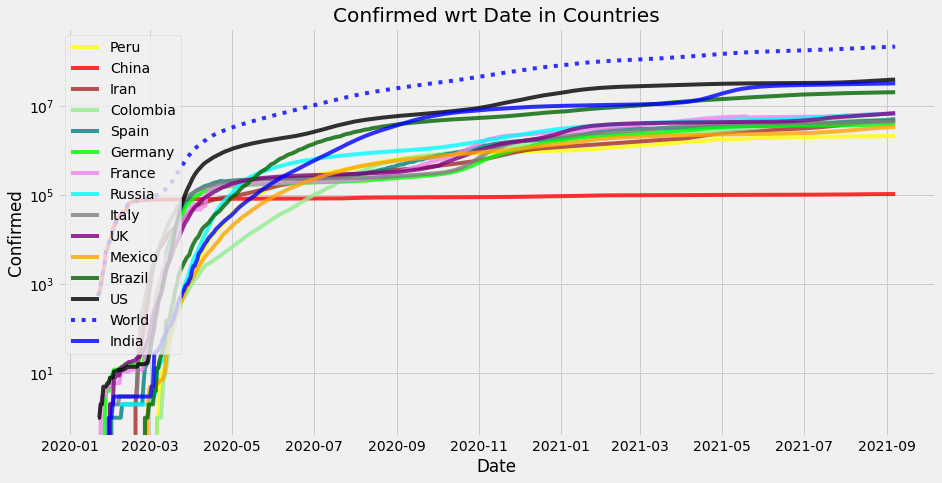

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-03,330,12440,3829,756,725,121,58,781,112,24,155,61,561,0,56
2021-09-04,308,7738,527,692,647,120,56,776,83,21,0,72,515,0,27
2021-09-05,219,6467,362,266,272,68,49,779,49,8,0,48,610,0,41
2021-09-06,290,7919,530,182,330,45,52,776,162,59,133,53,583,0,35
2021-09-07,369,9870,1513,298,1071,210,71,775,117,44,138,47,635,0,45


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-03,438.80,10169.42,1584.83,705.28,742.96,115.73,53.17,777.16,115.13,26.26,123.72,87.76,602.13,-0.0,51.59
2021-09-04,422.45,9865.49,1452.60,703.62,730.96,116.26,53.53,777.02,111.12,25.60,108.26,85.79,591.24,-0.0,48.51
2021-09-05,397.02,9440.68,1316.28,648.92,673.59,110.23,52.96,777.27,103.35,23.40,94.72,81.06,593.58,-0.0,47.57
2021-09-06,383.64,9250.47,1217.99,590.55,630.64,102.07,52.84,777.11,110.68,27.85,99.51,77.56,592.26,-0.0,46.00
2021-09-07,381.81,9327.91,1254.87,553.99,685.69,115.57,55.11,776.84,111.47,29.87,104.32,73.74,597.60,-0.0,45.88


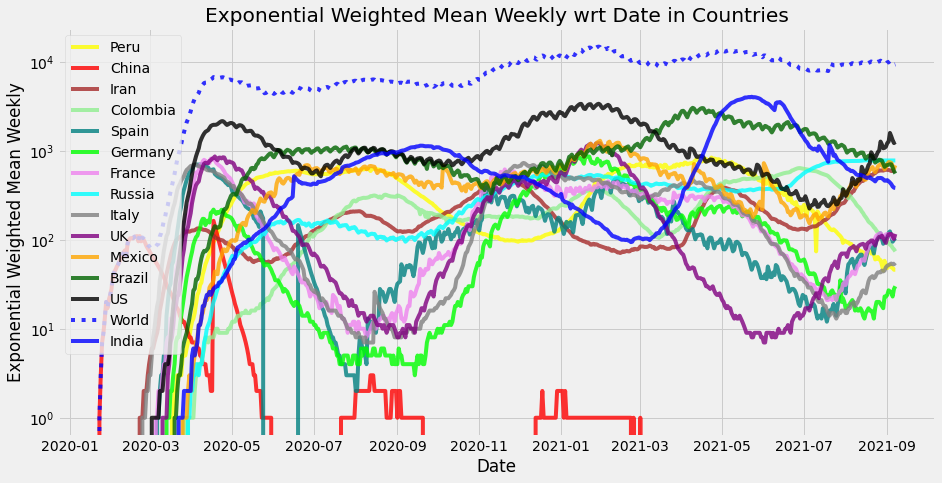

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

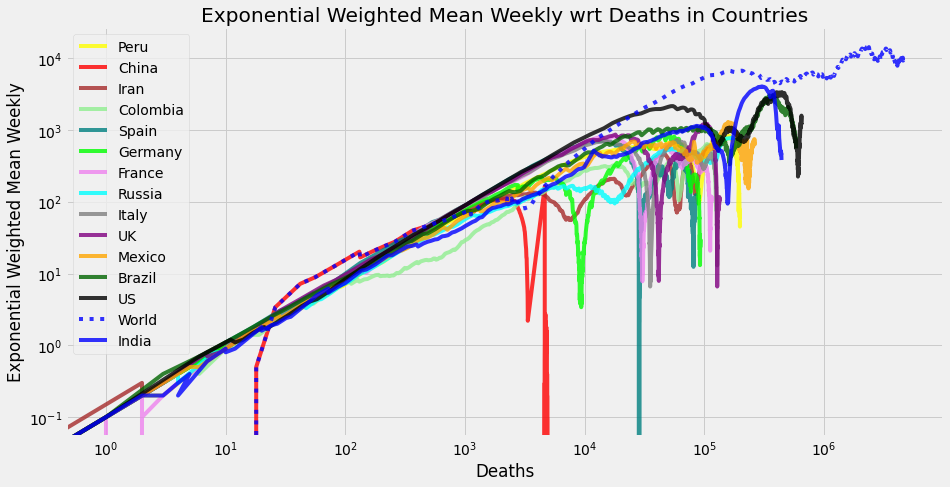

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

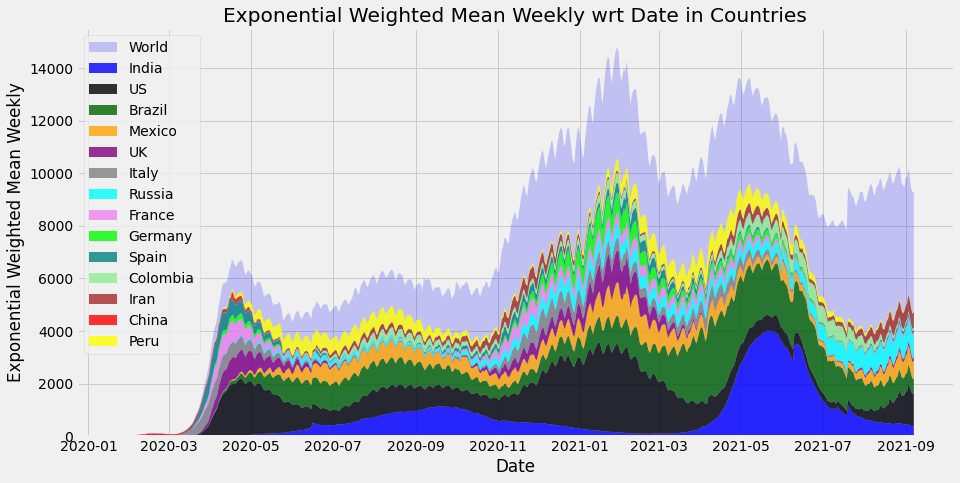

In [20]:
stackplotter(AVG, name)

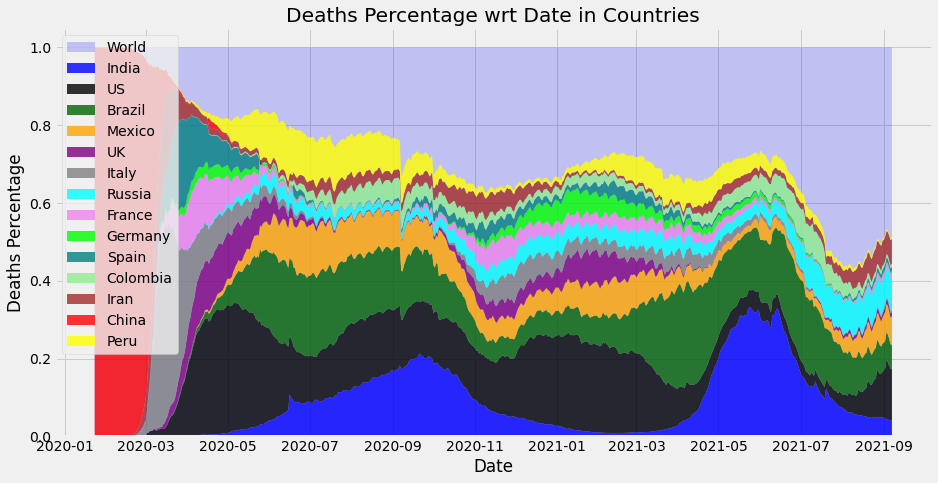

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

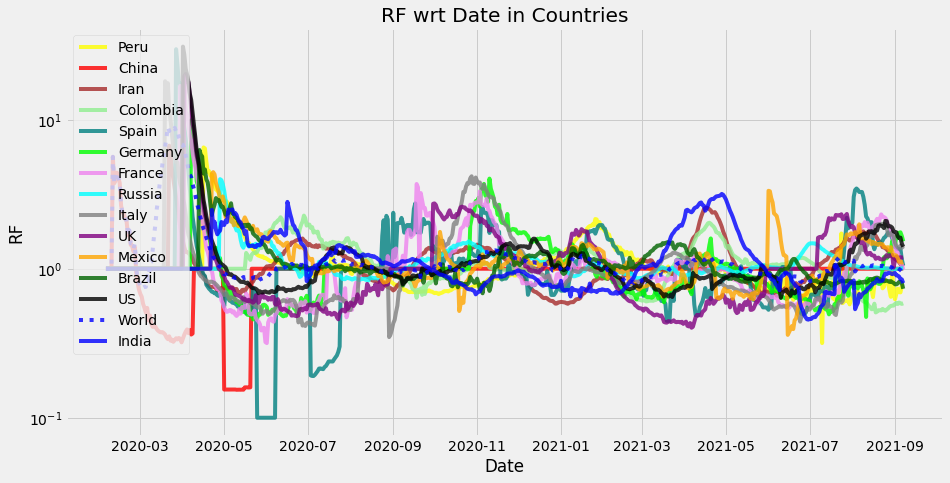

In [23]:
plotter(Reproductivity, 'RF')

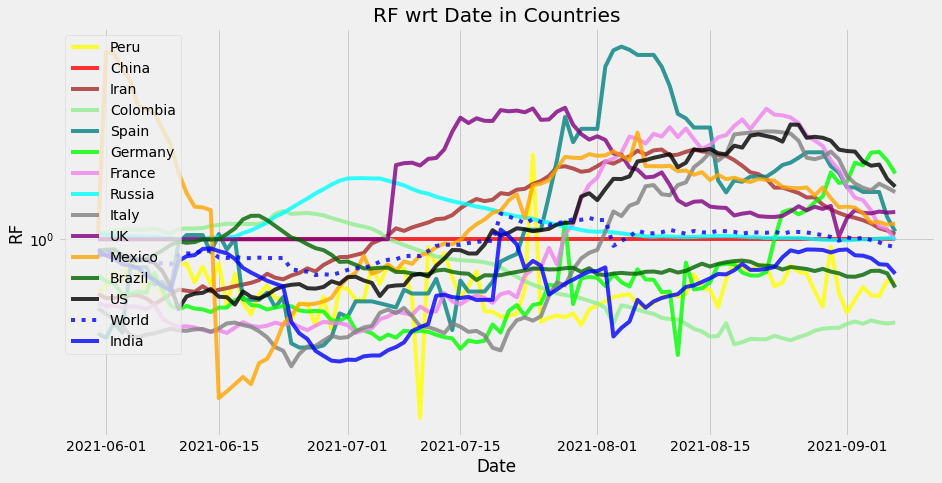

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

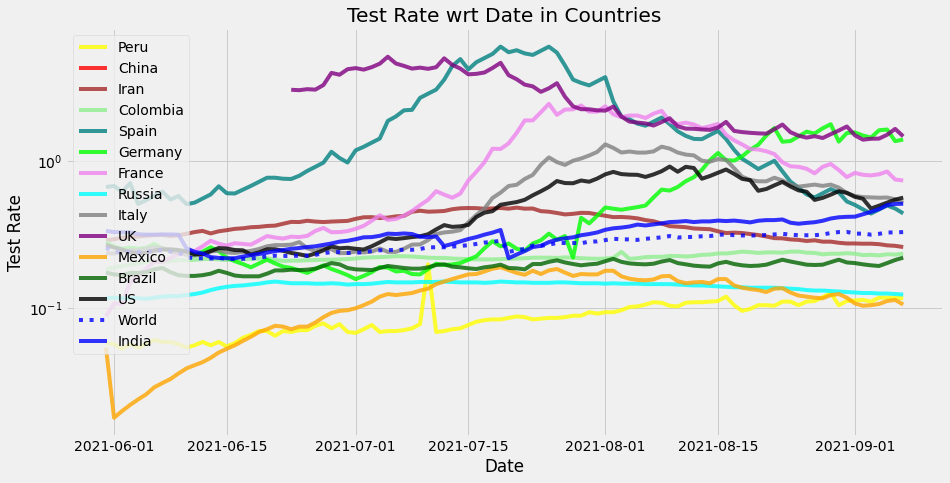

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

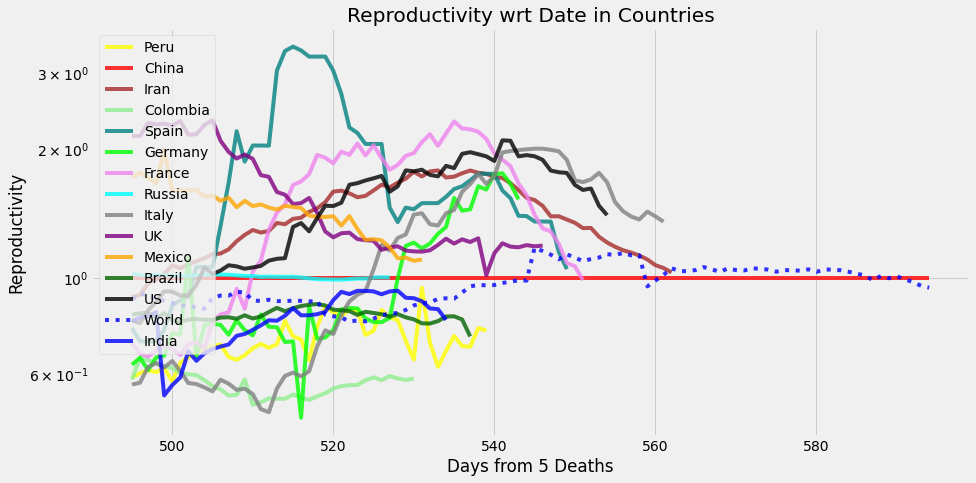

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

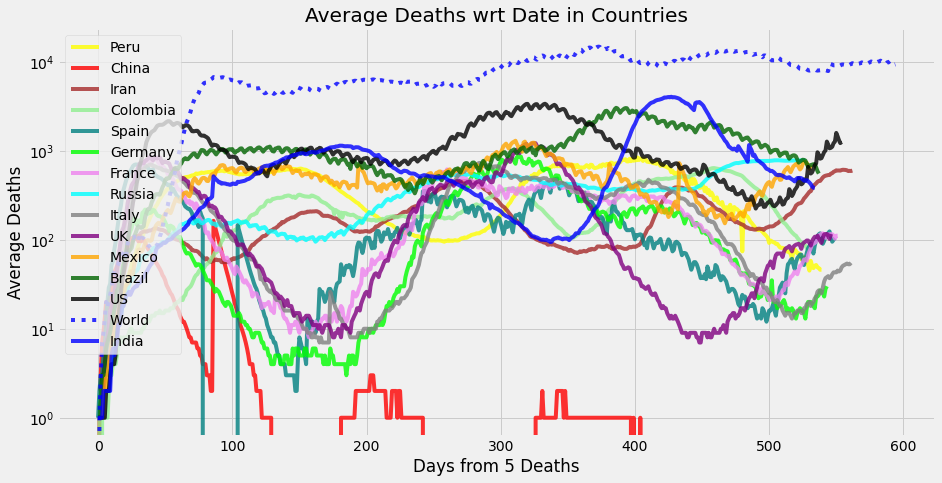

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

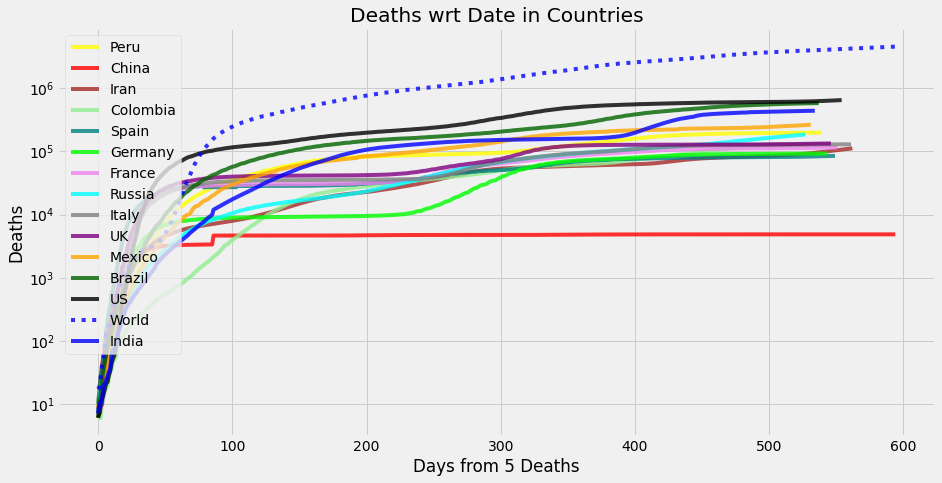

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4586161,9870,9532.14,9327.91,0.9520,221932892,0.330,615020,917.23
US,650511,1513,1474.57,1254.87,1.4034,40280001,0.566,142047,130.10
Brazil,584108,298,527.86,553.99,0.7336,20914237,0.221,24454,116.82
India,441411,369,341.57,381.81,0.8012,33096718,0.514,39247,88.28
Mexico,264541,1071,745.00,685.69,1.1069,3449295,0.106,14485,52.91
Peru,198568,45,43.57,45.88,0.7571,2156451,0.117,1072,39.71
Russia,185447,775,776.86,776.84,1.0055,6946922,0.124,19239,37.09
Indonesia,137156,683,590.43,710.37,0.5656,4140634,0.105,14927,27.43
UK,133808,210,135.57,115.57,1.1921,7089051,1.478,34153,26.76


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4586161,9870,9532.14,9327.91,0.9520,221932892,0.330,615020,917.23
US,650511,1513,1474.57,1254.87,1.4034,40280001,0.566,142047,130.10
Russia,185447,775,776.86,776.84,1.0055,6946922,0.124,19239,37.09
Mexico,264541,1071,745.00,685.69,1.1069,3449295,0.106,14485,52.91
Indonesia,137156,683,590.43,710.37,0.5656,4140634,0.105,14927,27.43
Iran,111892,635,585.43,597.60,1.0329,5184124,0.261,31240,22.38
Brazil,584108,298,527.86,553.99,0.7336,20914237,0.221,24454,116.82
Vietnam,13701,316,376.71,332.01,0.9655,550996,0.172,11389,2.74
India,441411,369,341.57,381.81,0.8012,33096718,0.514,39247,88.28


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4586161


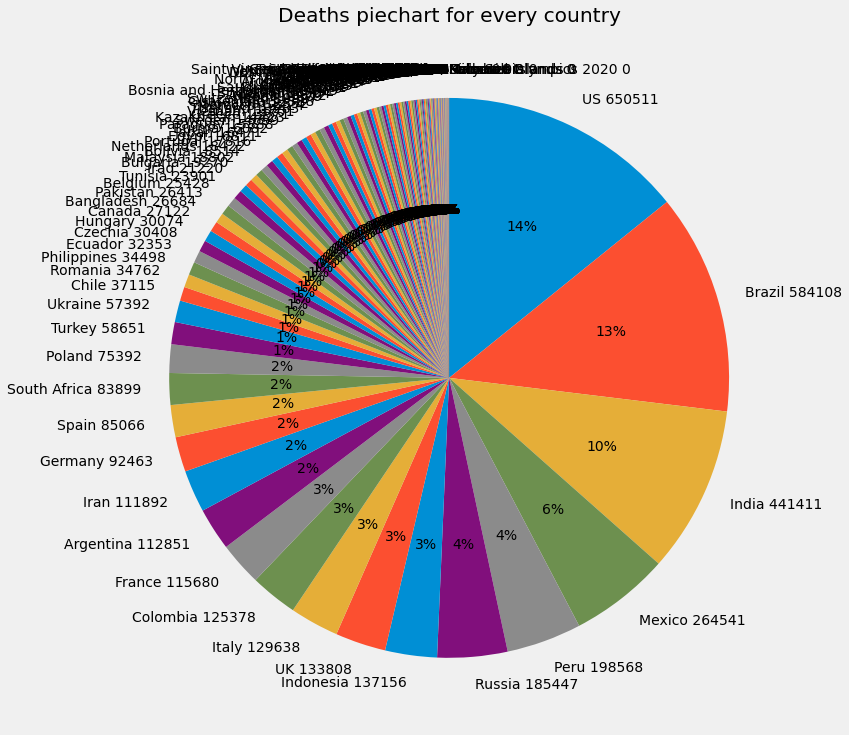

In [35]:
piechart('Deaths')

World total:  9532


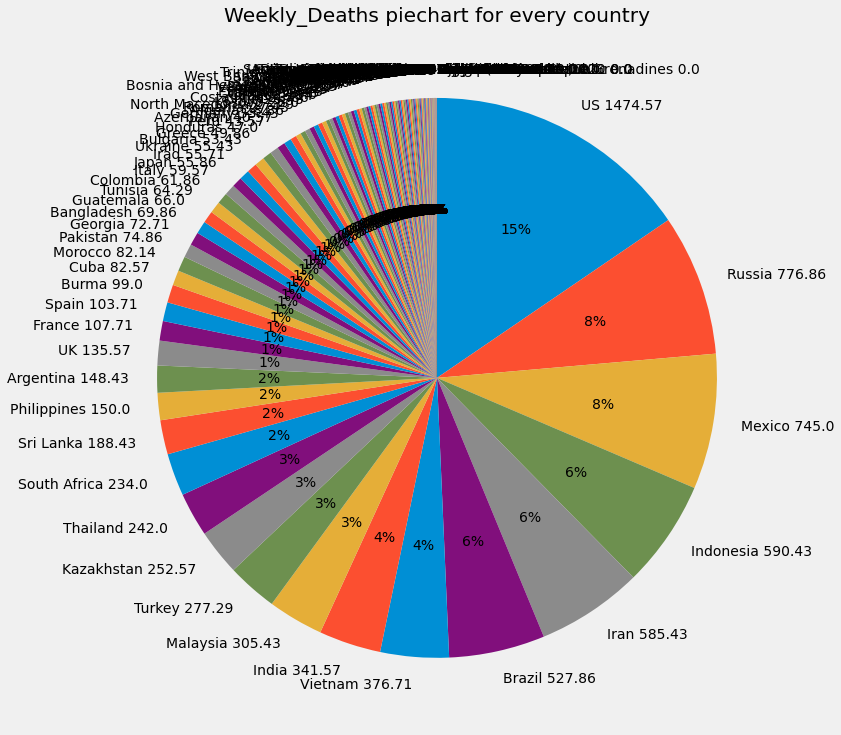

In [36]:
piechart('Weekly_Deaths')

World total:  9870


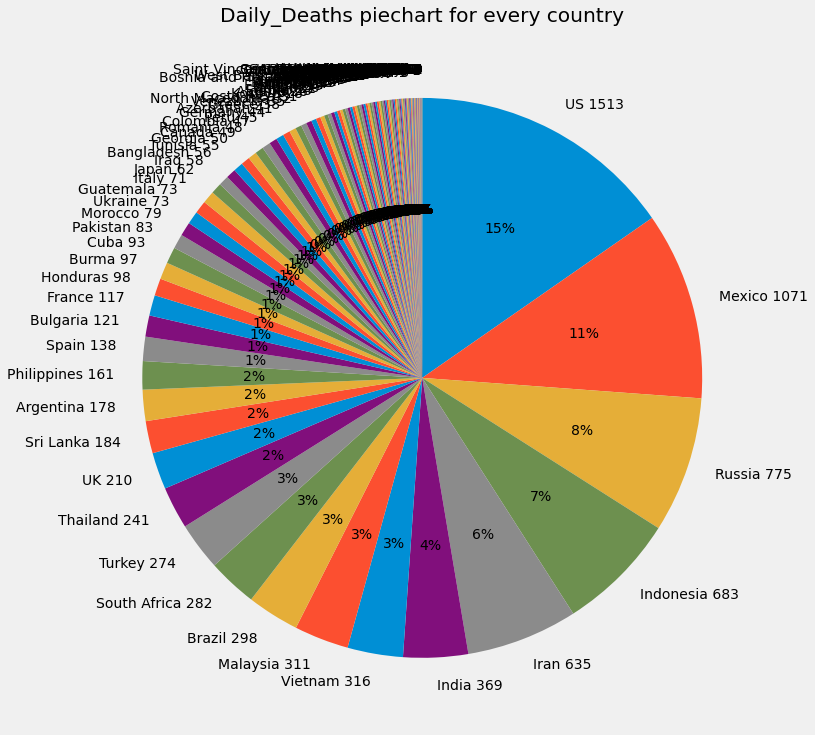

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-09-08


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

917232200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 6d9abbe] `date` update
 1 file changed, 2132 insertions(+), 2131 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (68%)


To https://github.com/Arrowheadahp/COVID-19.git
   d69597f..6d9abbe  master -> master
